## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
df = pd.read_csv('data_person.csv')
df.head()

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,...,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4,PERSONALITY
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,...,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0,extraverted
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,...,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0,serious
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,...,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0,dependable
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0,extraverted
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,...,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,lively


In [4]:
print('Shape of data is: %s entries and %s columns'%(df.shape[0],df.shape[1]))

Shape of data is: 1015341 entries and 21 columns


## Data Preprocessing

In [5]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1',
       'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2',
       'OPN3', 'OPN4', 'PERSONALITY'],
      dtype='object')


In [6]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2', 'OPN3', 'OPN4']


Categorical Columns in DF: 
 ['PERSONALITY']


### Missing Values

In [7]:
df.isnull().sum(axis=0)

EXT1           1783
EXT2           1783
EXT3           1783
EXT4           1783
EST1           1783
EST2           1783
EST3           1783
EST4           1783
AGR1           1783
AGR2           1783
AGR3           1783
AGR4           1783
CSN1           1783
CSN2           1783
CSN3           1783
CSN4           1783
OPN1           1783
OPN2           1783
OPN3           1783
OPN4           1783
PERSONALITY       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum(axis=0)

EXT1           0
EXT2           0
EXT3           0
EXT4           0
EST1           0
EST2           0
EST3           0
EST4           0
AGR1           0
AGR2           0
AGR3           0
AGR4           0
CSN1           0
CSN2           0
CSN3           0
CSN4           0
OPN1           0
OPN2           0
OPN3           0
OPN4           0
PERSONALITY    0
dtype: int64

### Uniques Categorical Values in DF

In [10]:
cat_col = df[['PERSONALITY']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

serious        230150
extraverted    214465
dependable     197294
lively         191557
responsible    180092
Name: PERSONALITY, dtype: int64



- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

## EDA

### Corr Between Numerical Columns

<AxesSubplot: >

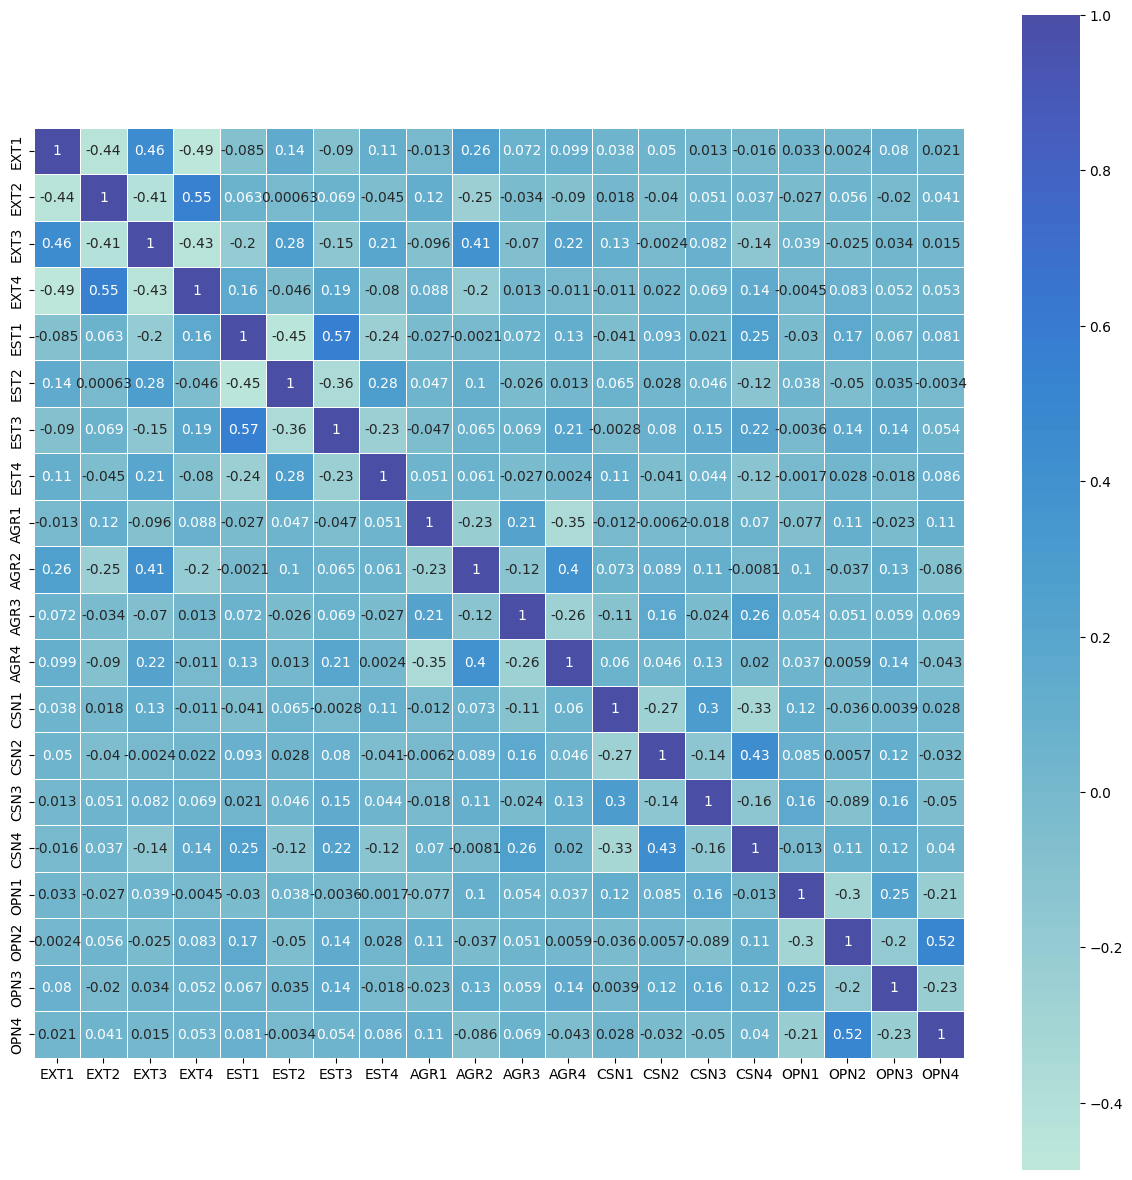

In [11]:
corr = df[['EXT1','EXT2','EXT3','EXT4','EST1','EST2','EST3','EST4','AGR1','AGR2','AGR3','AGR4','CSN1','CSN2','CSN3','CSN4','OPN1','OPN2','OPN3','OPN4']].corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

In [12]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background'}
est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue'}
agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings'}
csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things'}
opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [13]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 5):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


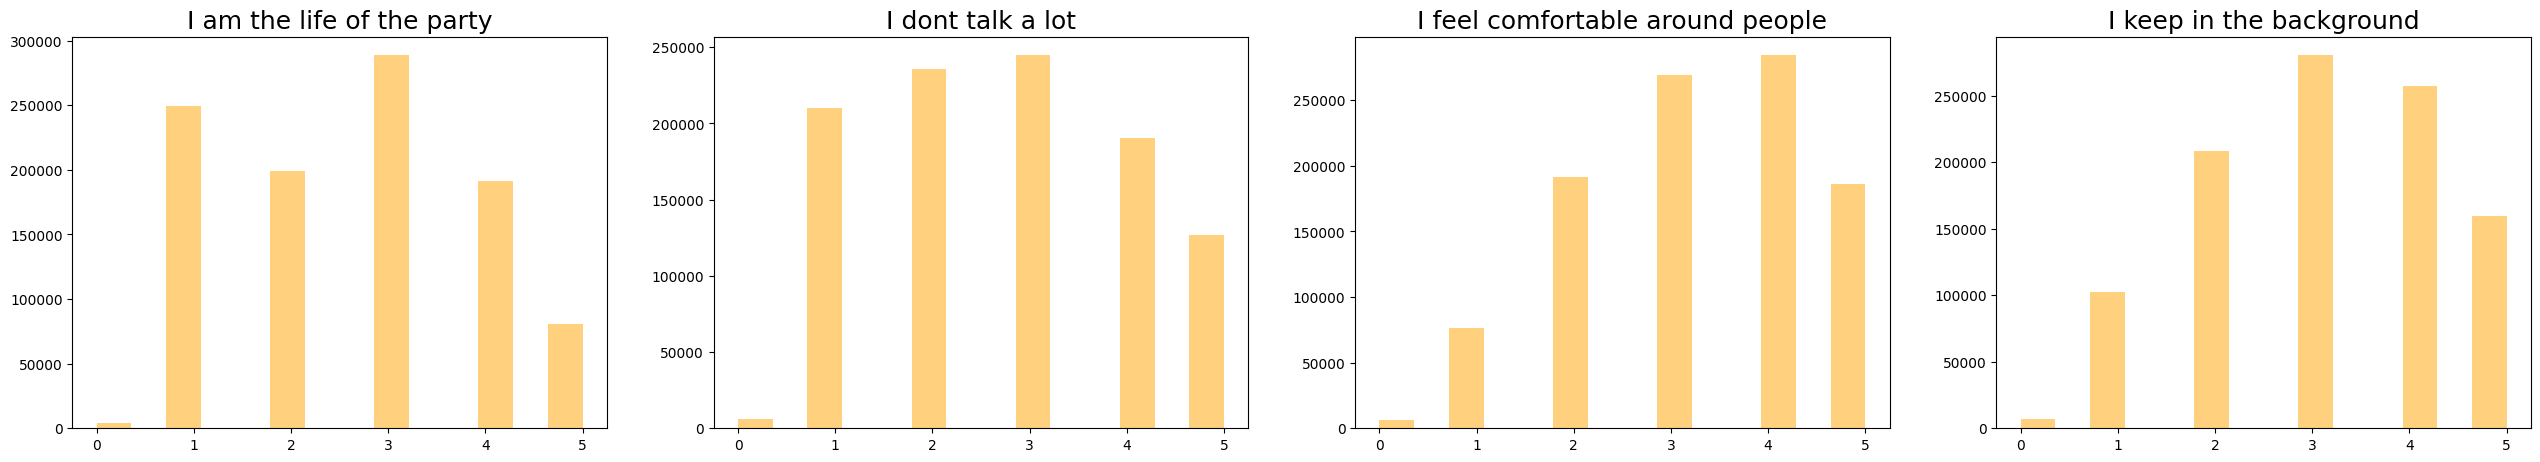

In [14]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


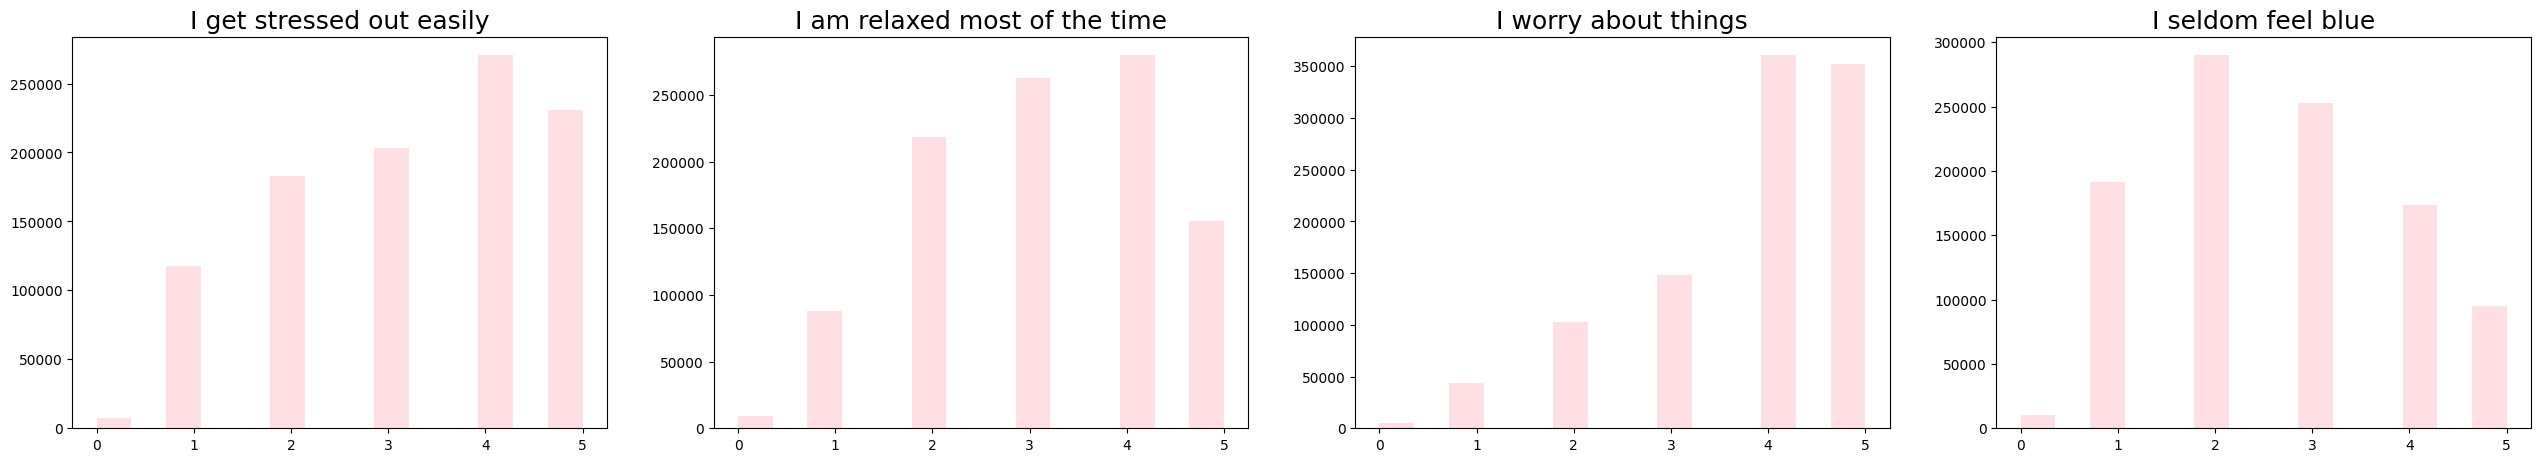

In [15]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


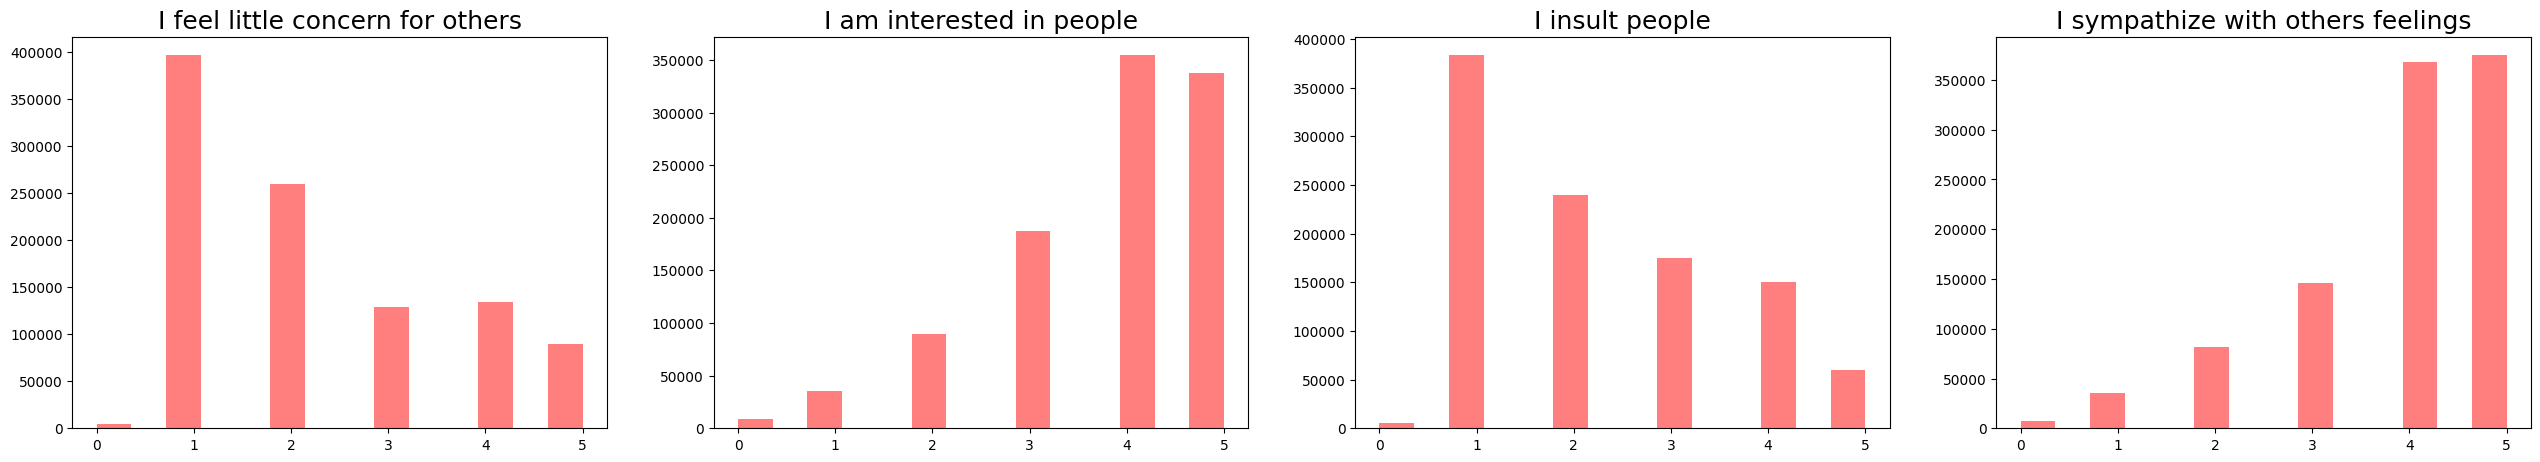

In [17]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


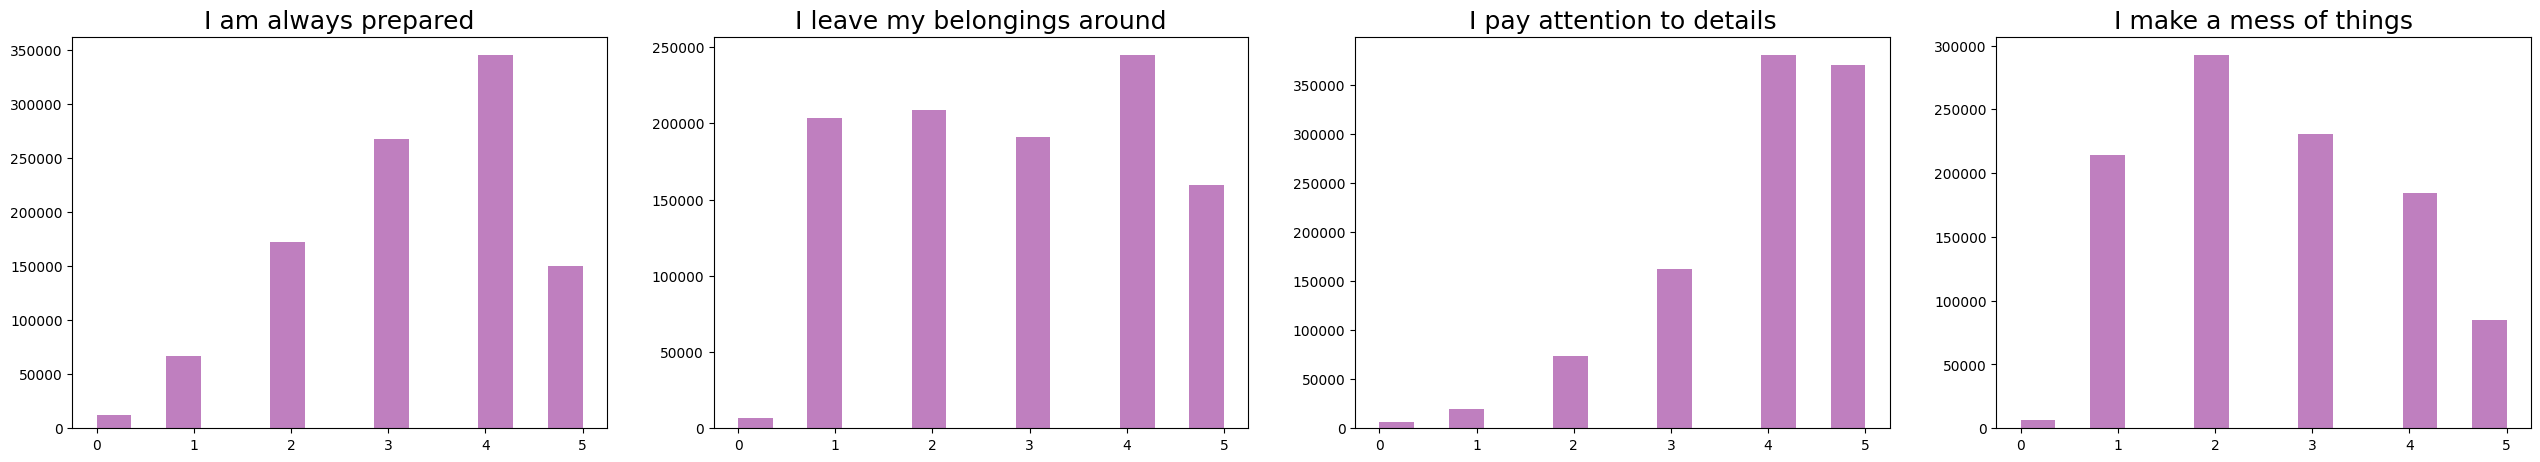

In [18]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


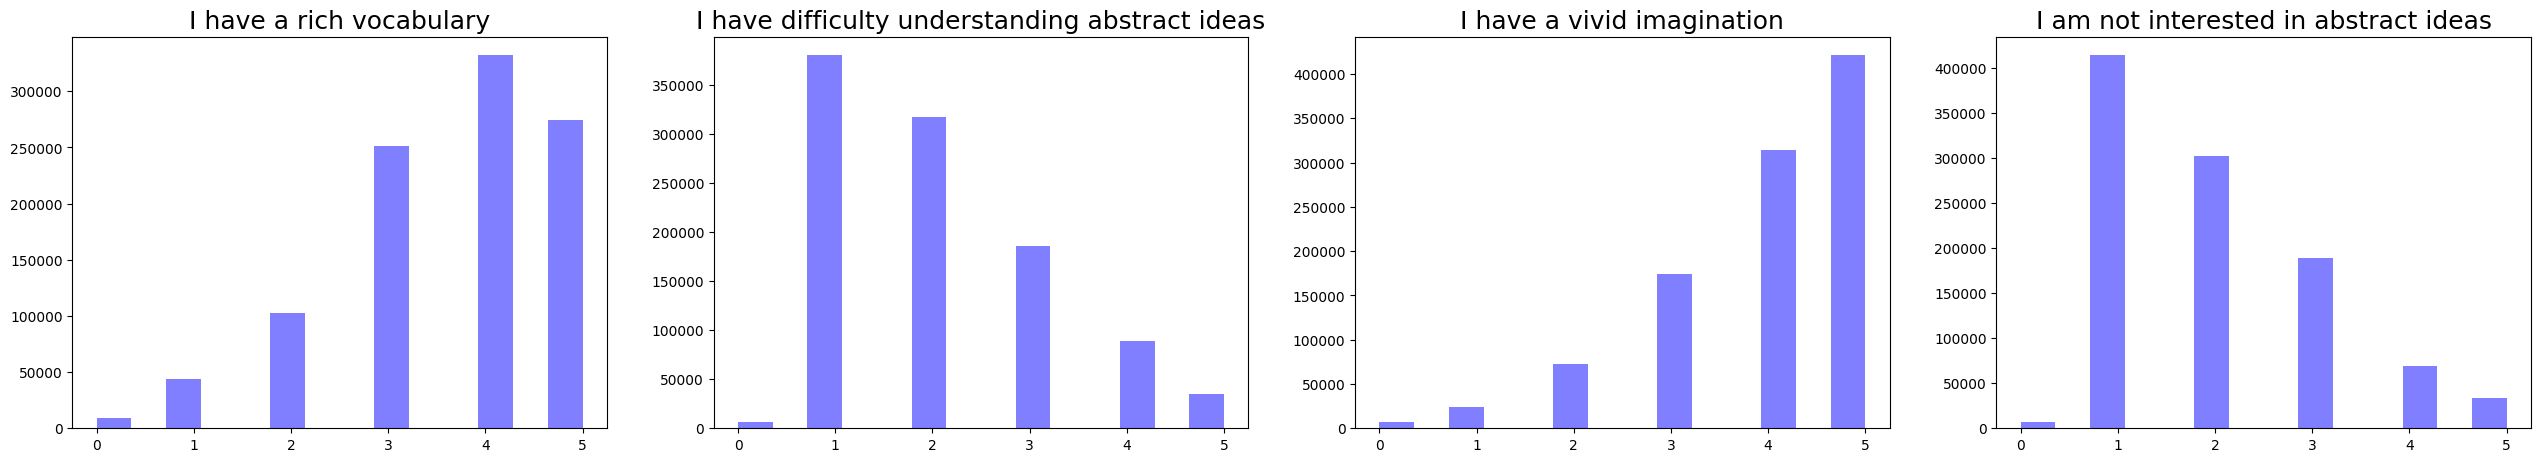

In [19]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

### Checking to see balance in the target variable

<AxesSubplot: xlabel='PERSONALITY', ylabel='count'>

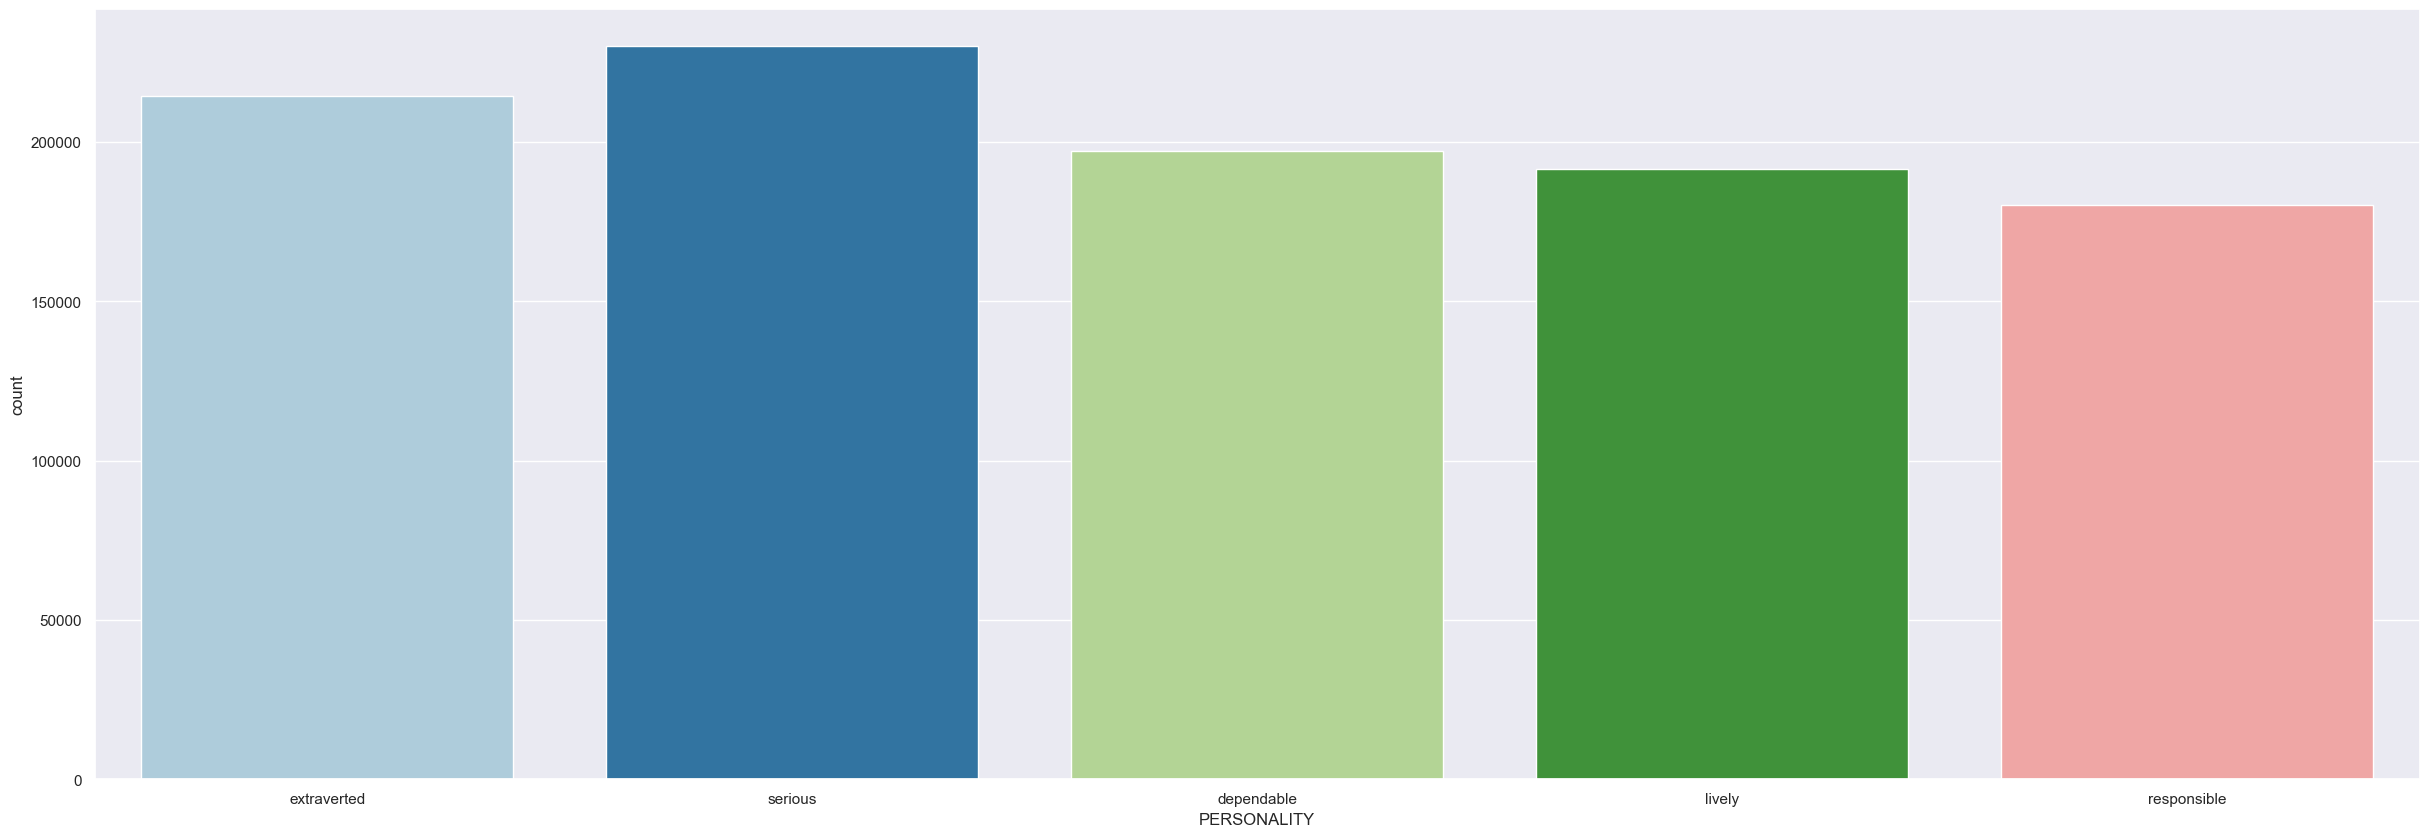

In [20]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x = df["PERSONALITY"], palette="Paired")

In [21]:
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,...,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4,PERSONALITY
0,4.0,1.0,5.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,...,4.0,3.0,4.0,3.0,2.0,5.0,1.0,4.0,1.0,extraverted
1,3.0,5.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,...,5.0,3.0,2.0,5.0,3.0,1.0,2.0,4.0,2.0,serious
2,2.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,4.0,...,4.0,4.0,2.0,2.0,2.0,5.0,1.0,2.0,1.0,dependable
3,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,4.0,2.0,5.0,2.0,extraverted
4,3.0,3.0,3.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0,...,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,lively


### Convert all the columns from float to int

In [22]:
df['EXT1'] = df['EXT1'].astype(int)
df['EXT2'] = df['EXT2'].astype(int)
df['EXT3'] = df['EXT3'].astype(int)
df['EXT4'] = df['EXT4'].astype(int)
df['EST1'] = df['EST1'].astype(int)
df['EST2'] = df['EST2'].astype(int)
df['EST3'] = df['EST3'].astype(int)
df['EST4'] = df['EST4'].astype(int)
df['AGR1'] = df['AGR1'].astype(int)
df['AGR2'] = df['AGR2'].astype(int)
df['AGR3'] = df['AGR3'].astype(int)
df['AGR4'] = df['AGR4'].astype(int)
df['CSN1'] = df['CSN1'].astype(int)
df['CSN2'] = df['CSN2'].astype(int)
df['CSN3'] = df['CSN3'].astype(int)
df['CSN4'] = df['CSN4'].astype(int)
df['OPN1'] = df['OPN1'].astype(int)
df['OPN2'] = df['OPN2'].astype(int)
df['OPN3'] = df['OPN3'].astype(int)
df['OPN4'] = df['OPN4'].astype(int)

In [23]:
display(df.dtypes)

EXT1            int32
EXT2            int32
EXT3            int32
EXT4            int32
EST1            int32
EST2            int32
EST3            int32
EST4            int32
AGR1            int32
AGR2            int32
AGR3            int32
AGR4            int32
CSN1            int32
CSN2            int32
CSN3            int32
CSN4            int32
OPN1            int32
OPN2            int32
OPN3            int32
OPN4            int32
PERSONALITY    object
dtype: object

In [ ]:
#df.to_csv('test.csv')

In [24]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EST1', 'EST2', 'EST3', 'EST4', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'OPN1', 'OPN2', 'OPN3', 'OPN4']


In [25]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df_cluster = df.drop('PERSONALITY', axis=1)
columns = list(df_cluster.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df_cluster = scaler.fit_transform(df_cluster)
df_cluster = pd.DataFrame(df_cluster, columns=columns)
df_sample = df_cluster[:5000]

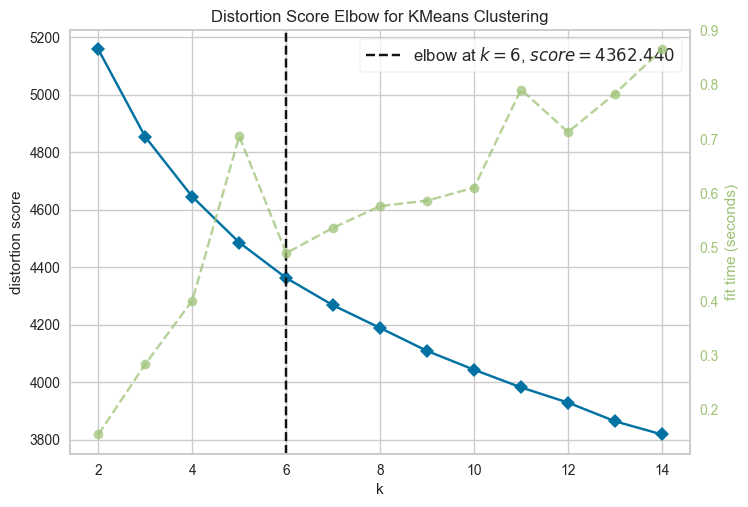

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [27]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

df_model = df_cluster

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [28]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EST1,...,OPN1,OPN2,OPN3,OPN4,Clusters
0,0.8,0.2,1.0,0.4,0.2,...,1.0,0.2,0.8,0.2,1
1,0.6,1.0,0.6,0.8,0.4,...,0.2,0.4,0.8,0.4,4
2,0.4,0.6,0.8,0.8,0.8,...,1.0,0.2,0.4,0.2,4
3,0.4,0.4,0.4,0.6,0.6,...,0.8,0.4,1.0,0.4,2
4,0.6,0.6,0.6,0.6,0.2,...,1.0,0.2,1.0,0.2,1


In [30]:
df_model.Clusters.value_counts()

0    227082
4    215773
1    199764
2    193567
3    177372
Name: Clusters, dtype: int64

In [31]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EST1,EST2,EST3,EST4,AGR1,AGR2,AGR3,AGR4,CSN1,CSN2,CSN3,CSN4,OPN1,OPN2,OPN3,OPN4
Clusters,,,,,,,,,,,,,,,,,,,,
0,0.719675,0.350921,0.786647,0.473186,0.761872,0.597241,0.851425,0.498848,0.425999,0.866040,0.539323,0.837391,0.589734,0.749801,0.760437,0.652060,0.733364,0.438165,0.837719,0.407898
1,0.672553,0.413404,0.857287,0.466839,0.409008,0.804185,0.587018,0.679939,0.362304,0.883462,0.352437,0.851166,0.745033,0.505565,0.840529,0.365739,0.789591,0.332747,0.819335,0.345453
2,0.346895,0.733805,0.441567,0.826658,0.843769,0.494401,0.904937,0.414760,0.468379,0.690793,0.516049,0.782162,0.541617,0.747166,0.766612,0.734267,0.739107,0.438511,0.843575,0.388521
3,0.445413,0.667913,0.558221,0.682706,0.463818,0.727964,0.598710,0.585698,0.656243,0.575098,0.527208,0.558575,0.636839,0.538766,0.732329,0.478141,0.670551,0.429541,0.707092,0.443815
4,0.430386,0.645874,0.612738,0.717507,0.768388,0.558489,0.870148,0.494488,0.375417,0.777399,0.332955,0.859626,0.778583,0.382608,0.866471,0.382812,0.716344,0.434604,0.779751,0.416367


In [32]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.633185,0.654589,0.0,0.0,0.0
1,0.613600,0.594759,0.1,0.0,0.0
2,0.616597,0.649759,0.2,0.0,0.0
3,0.596178,0.572286,0.3,0.0,0.0
4,0.625083,0.595012,0.4,0.0,0.0


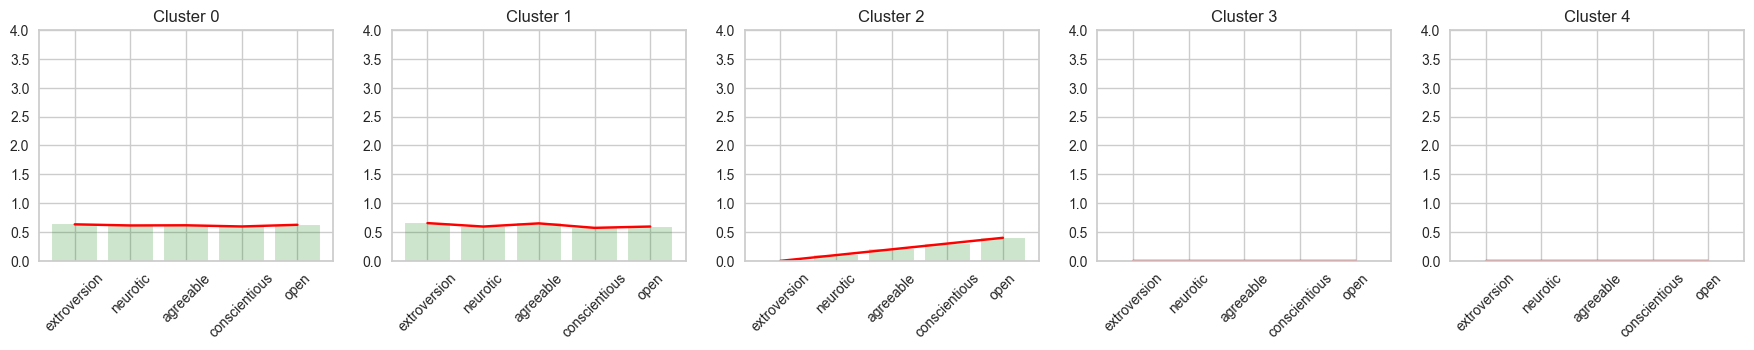

In [33]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

In [34]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-1.066628,0.492751,1
1,2.072106,0.056712,4
2,2.044138,0.244620,4
3,0.008968,-0.275131,2
4,-0.917555,0.639210,1


Text(0.5, 1.0, 'Personality Clusters after PCA')

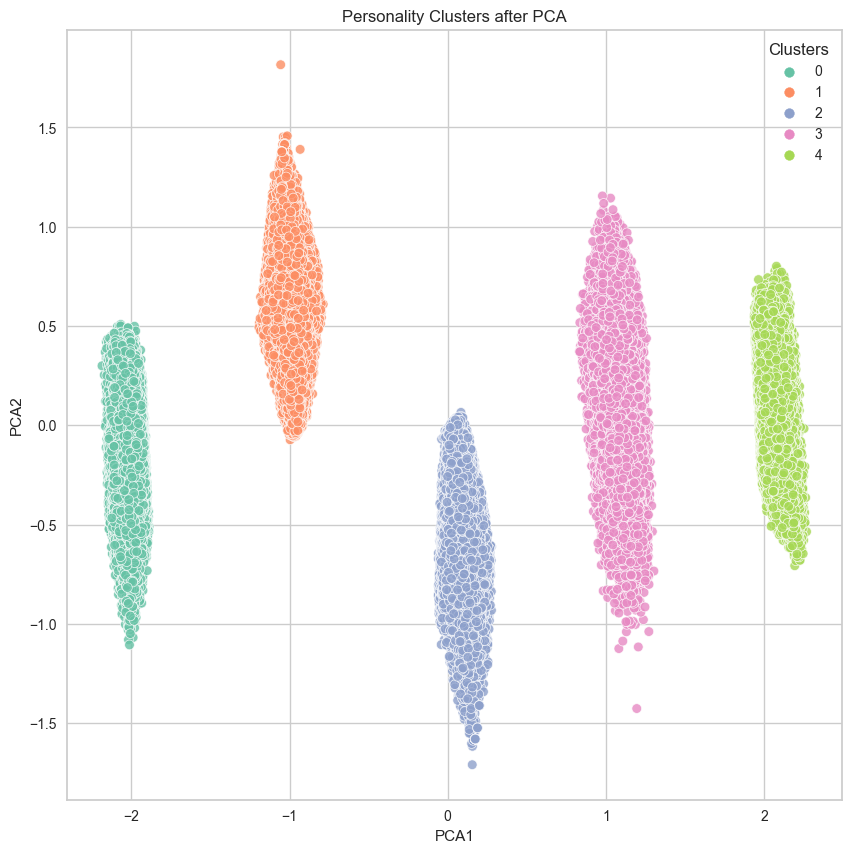

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

## Machine Learning Models to get best accuracy

In [36]:
feed = df[['EXT1','EXT2','EXT3','EXT4','EST1','EST2','EST3','EST4','AGR1','AGR2','AGR3','AGR4','CSN1','CSN2','CSN3','CSN4','OPN1','OPN2','OPN3','OPN4','PERSONALITY']]

# Choosing independent vars
df_train_x = feed.drop('PERSONALITY',axis = 1)

# Choosing all target vars
df_train_y = feed['PERSONALITY']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.10, random_state=42)

In [37]:
y_train = pd.DataFrame(y_train, columns = ["PERSONALITY"])
y_train.head()
y_test = pd.DataFrame(y_test, columns = ["PERSONALITY"])
y_test

,PERSONALITY
257675,extraverted
641203,dependable
20841,lively
641164,responsible
266356,responsible
...,...
566291,lively
107030,lively
238224,extraverted
933576,responsible


### Machine Learning Model Fittings

### 1. Decision Tree


In [38]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[3758 4081 3664 3544 4494]
 [4333 4479 4079 3853 4836]
 [3807 4013 3590 3474 4331]
 [3542 3695 3292 3233 4025]
 [4651 4894 4395 4091 5202]]
  
accuracy= 19.990923082994595


### Data for single instance prediction

In [39]:
userdata = [['2','2','2','3','1','1','1','2','1','1','1','1','1','1','5','5','5','5','5','5']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['responsible']
Probabilities of all classes:  [[0. 0. 0. 1. 0.]]
Probability of Predicted class :  1.0


In [42]:
from sklearn.metrics import classification_report

In [43]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train, y_train)
y_pred_classification = dtree.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

  dependable       0.00      0.00      0.00         0
 extraverted       0.00      0.00      0.00         0
      lively       0.00      0.00      0.00         0
 responsible       0.00      0.00      0.00         0
     serious       1.00      0.23      0.37    101356

    accuracy                           0.23    101356
   macro avg       0.20      0.05      0.07    101356
weighted avg       1.00      0.23      0.37    101356



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=1)

In [41]:
y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[    0     0     0     0 19541]
 [    0     0     0     0 21580]
 [    0     0     0     0 19215]
 [    0     0     0     0 17787]
 [    0     0     0     0 23233]]


0.22922175302892775

Classification Report

In [44]:
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(x_train, y_train)
y_pred_classification = rf.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

  dependable       0.00      0.00      0.00         0
 extraverted       0.00      0.00      0.00         0
      lively       0.00      0.00      0.00         0
 responsible       0.00      0.00      0.00         0
     serious       1.00      0.23      0.37    101356

    accuracy                           0.23    101356
   macro avg       0.20      0.05      0.07    101356
weighted avg       1.00      0.23      0.37    101356



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred_classification = rf.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Model Performance
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[    0    57     0     0 19484]
 [    0    75     0     0 21505]
 [    0    84     0     0 19131]
 [    0    56     0     0 17731]
 [    0    86     0     0 23147]]


0.22911322467342832

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred_classification = rf.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

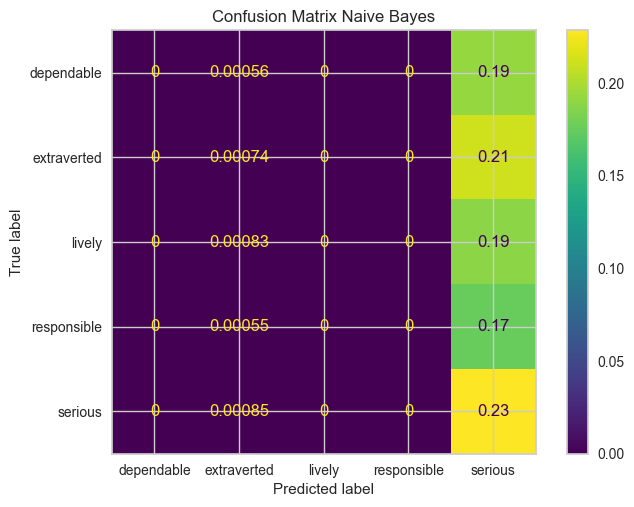

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, normalize="all")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

### XGBOOST

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [ ]:
import xgboost as xgb 
model = xgb.XGBClassifier()
model.fit(x_train, y_train_le)
print(); print(model)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [ ]:
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

ValueError: Mix of label input types (string and number)

### SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_pred_classification = rf.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[    0     0     0     0 19541]
 [    0     0     0     0 21580]
 [    0     0     0     0 19215]
 [    0     0     0     0 17787]
 [    0     0     0     0 23233]]


0.22922175302892775

In [ ]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred_classification = rf.predict(x_test)

report = classification_report(y_pred, y_test)

print("Classification Report: ")
print(report)

####

In [ ]:
import pickle 
pickle.dump(dtree,open('personality_model.pkl','wb'))